In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

In [3]:
titanic_df = pd.read_csv('./train.csv')

In [4]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
#NULL 값을 채워야 한다. fillna
titanic_df['Age'].fillna(titanic_df['Age'].mean(),inplace=True)
titanic_df['Cabin'].fillna('N',inplace=True)
titanic_df['Embarked'].fillna('N',inplace=True)
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
print("Sex 값 분포 :\n",titanic_df['Sex'].value_counts(),"\n")
print("Cabin 값 분포 \n:",titanic_df['Cabin'].value_counts(),"\n")
print("Embarked 값 분포 \n:",titanic_df['Embarked'].value_counts(),"\n")

Sex 값 분포 :
 male      577
female    314
Name: Sex, dtype: int64 

Cabin 값 분포 
: N              687
C23 C25 C27      4
G6               4
B96 B98          4
E101             3
              ... 
C103             1
B30              1
E17              1
B37              1
A31              1
Name: Cabin, Length: 148, dtype: int64 

Embarked 값 분포 
: S    644
C    168
Q     77
N      2
Name: Embarked, dtype: int64 



In [8]:
#Cabin data의 앞글자 뽑아오기 
titanic_df['Cabin']=titanic_df['Cabin'].str[:1]
titanic_df['Cabin'].head()

0    N
1    C
2    N
3    C
4    N
Name: Cabin, dtype: object

In [23]:
titanic_df.groupby(['Sex','Survived'])["Survived"].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

<AxesSubplot:xlabel='Sex', ylabel='Survived'>

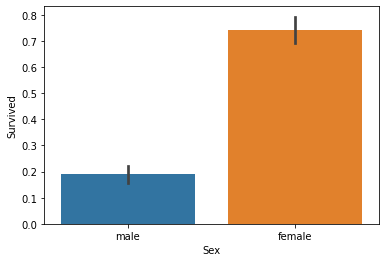

In [10]:
sns.barplot(x='Sex',y='Survived',data=titanic_df)

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

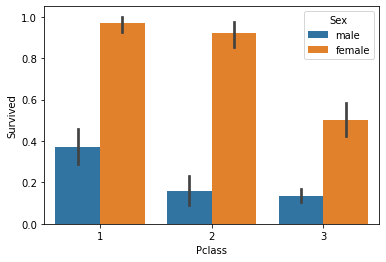

In [11]:
sns.barplot(x='Pclass',y='Survived',hue='Sex',data=titanic_df)

In [ ]:
## lambda 인자 : 표현식      한줄로 함수를 만든다.
## apply() DataFrame에 적용

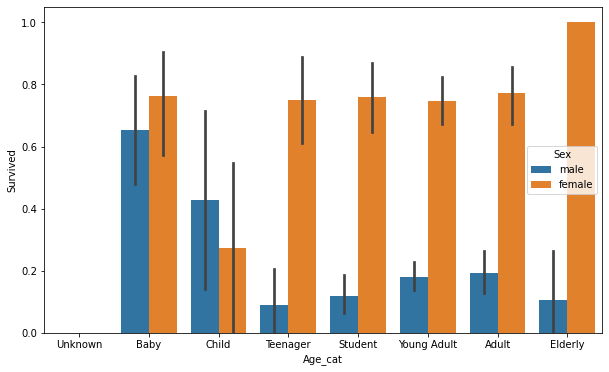

In [12]:
def get_category(age):
    cat = ""
    
    if age<=-1:
        cat="Unkown"
    elif age<=5:
        cat="Baby"
    elif age<=12:
        cat="Child"
    elif age<=18:
        cat="Teenager"    
    elif age<=25:
        cat="Student"    
    elif age<=35:
        cat="Young Adult"    
    elif age<=60:
        cat="Adult"    
    else:
        cat='Elderly'
        
    return cat

plt.figure(figsize=(10,6))

group_names = ["Unknown","Baby","Child","Teenager","Student","Young Adult","Adult","Elderly"]

#lambda 식에 위에서 생성한 get_category()함수를 반환값으로 지정.
titanic_df['Age_cat'] = titanic_df['Age'].apply(lambda x:get_category(x))
sns.barplot(x='Age_cat',y='Survived',hue='Sex',data=titanic_df,order=group_names)
titanic_df.drop("Age_cat",axis=1,inplace=True)        
        

In [13]:
from sklearn import preprocessing 
def encode_features(dataDF):
    features = ['Cabin','Sex','Embarked']
    for feature in features:
        le = preprocessing.LabelEncoder()
        le =le.fit(dataDF[feature])
        dataDF[feature] = le.transform(dataDF[feature])
        
    return dataDF

titanic_df = encode_features(titanic_df)
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,7,3
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,2,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,7,3
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,2,3
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,7,3


## 피쳐 정리 및 함수화 

In [14]:

def fillna(df):
    df["Age"].fillna(df["Age"].mean(),inplace=True)
    df["Cabin"].fillna('N',inplace = True)
    df["Embarked"].fillna('N',inplace=True)
    df["Fare"].fillna(0,inplace=True)
    
    return df

def drop_feature(df):
    df.drop(["PassengerId","Name","Ticket"],axis=1,inplace=True)
    return df

def format_feature(df):
    df["Cabin"] = df["Cabin"].str[:1]
    features = ["Cabin","Sex","Embarked"]
    for feature in features:
        le = preprocessing.LabelEncoder()
        le = le.fit(df[feature])
        df[feature] = le.transform(df[feature])
        
    return df 

def transform_features(df):
    df = fillna(df)
    df = drop_feature(df)
    df = format_feature(df)
    
    return df 


In [15]:
#데이터 가공 
titanic_df = pd.read_csv("./train.csv")
y_titanic_df = titanic_df['Survived']
X_titanic_df = titanic_df.drop('Survived',axis=1)

X_titanic_df = transform_features(X_titanic_df)

In [16]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_titanic_df,y_titanic_df,test_size=0.2,random_state=11)

### 학습/예측/평가

In [17]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

dt_clf = DecisionTreeClassifier(random_state=11)
rf_clf = RandomForestClassifier(random_state=11)
lr_clf = LogisticRegression()

#DecisionTreeClassifier 학습/예측/평가
dt_clf.fit(X_train,y_train)
dt_pred = dt_clf.predict(X_test)
print("DecisionTreeClassifier 정확도 :{:.4f}".format(accuracy_score(y_test,dt_pred)))

#RandomForestClassifier 학습/예측/평가
rf_clf.fit(X_train,y_train)
rf_pred = rf_clf.predict(X_test)
print("RandomForestClassifier 정확도 : {:.4f}".format(accuracy_score(y_test,rf_pred)))

#LogisticRegression 학습/예측/평가
lr_clf.fit(X_train,y_train)
lr_pred = lr_clf.predict(X_test)
print("LogisticRegression 정확도 : {:.4f}".format(accuracy_score(y_test,lr_pred)))


DecisionTreeClassifier 정확도 :0.7877
RandomForestClassifier 정확도 : 0.8547
LogisticRegression 정확도 : 0.8492


/Users/leejunseung/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


## 검증 
1. kfold
2. cross_val_score()

In [18]:
from sklearn.model_selection import KFold

In [19]:
def exec_kfold(clf,folds=5):
    kfold = KFold(n_splits=folds)
    scores = []
    
    for iter_count , (train_index,test_index) in enumerate(kfold.split(X_titanic_df)):
        #kfold.split 함수는 학습용,검증용 데이터를 row index 반환
        X_train,X_test = X_titanic_df.values[train_index],X_titanic_df.values[test_index]
        y_train,y_test = y_titanic_df.values[train_index],y_titanic_df.values[test_index]
        
        #Classifier 학습/예측 정확도 계산 
        clf.fit(X_train,y_train)
        predictions = clf.predict(X_test)
        accuracy = accuracy_score(y_test,predictions)
        scores.append(accuracy)
        print("교차 검증 {} 정확도 : {:.4f}".format(iter_count,accuracy))
        
    mean_score = np.mean(scores)
    print("평균 정확도:{0:.4f}".format(mean_score))
    
#exec_kfold 호출 
exec_kfold(dt_clf,folds=5)

교차 검증 0 정확도 : 0.7542
교차 검증 1 정확도 : 0.7809
교차 검증 2 정확도 : 0.7865
교차 검증 3 정확도 : 0.7697
교차 검증 4 정확도 : 0.8202
평균 정확도:0.7823


In [20]:
#cross_val_score 는 StratifiedKFold 사용 
from sklearn.model_selection import cross_val_score

scores = cross_val_score(dt_clf,X_titanic_df,y_titanic_df,cv=5)
for iter_count , accuracy in enumerate(scores):
    print("교차검증 {} 정확도 : {:.4f}".format(iter_count,accuracy))
    
print("평균 정확도 : {:.4f}".format(np.mean(scores)))    

교차검증 0 정확도 : 0.7430
교차검증 1 정확도 : 0.7753
교차검증 2 정확도 : 0.7921
교차검증 3 정확도 : 0.7865
교차검증 4 정확도 : 0.8427
평균 정확도 : 0.7879


### GridSearchCV를 이용해 DecisionTreeClassifer의 최적 하이퍼 파라미터를 찾고 예측성능 측정 

[의사결정 트리 하이퍼파라미터](https://dsbook.tistory.com/154)

## 하이퍼 파라미터 

1. min_samples_split 

노드를 분할하기 위한 최소한의 샘플 데이터 수로 과적합을 제어하는데 사용됨
default 2 작게 설정할수록 분할되는 노드가 많아져서 과적합 가능석 증가

2. min_samples_leaf

말단 노드가 되기 위한 최소한의 샘플데이터 수 
위와 유사하게 과적합 제어용도 

3. max_depth

트리의 최대 깊이 규정 
default None None으로 설정하면 완벽하게 클래스 결정 값이 될 때까지 깊이를 계속 키우며 분할하거나 노드가 가지는 데이터 개수가 min_samples_split보다 작아질 때까지 계속 깊이를 증가시킴 >> 과적함 가능성 증가

![과적합]("/Users/leejunseung/Desktop/Bigtato/overfitting.png")

In [28]:
from sklearn.model_selection import GridSearchCV

parameters = {'max_depth':[2,3,5,10],'min_samples_split':[2,3,5],'min_samples_leaf':[1,5,8]}

grid_dclf = GridSearchCV(dt_clf,param_grid = parameters,scoring='accuracy',cv=5)
grid_dclf.fit(X_train,y_train)

print("GridSearchCV 최적 하이퍼 파라미터 :",grid_dclf.best_params_)
print("GridSearchCV 최고 정확도 :",grid_dclf.best_score_)
best_dclf = grid_dclf.best_estimator_

dpredictions = best_dclf.predict(X_test)
accuracy = accuracy_score(y_test,dpredictions)
print("테스트 세트에서의 DecisionTreeClassifier 정확도:{:.4f}".format(accuracy))



GridSearchCV 최적 하이퍼 파라미터 : {'max_depth': 3, 'min_samples_leaf': 5, 'min_samples_split': 2}
GridSearchCV 최고 정확도 : 0.7991825076332119
테스트 세트에서의 DecisionTreeClassifier 정확도:0.8715
